## Time Series Forecasting : ARIMA vs Prophet
https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a
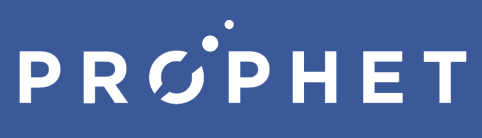

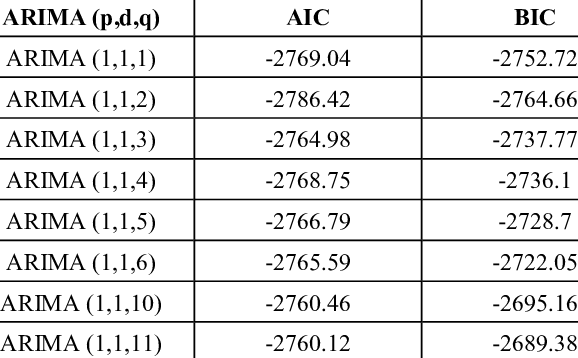

# pmdarima - auto_arima
- pip install pmdarima

In [10]:
# Import bilbiotecas
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
pd.plotting.register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

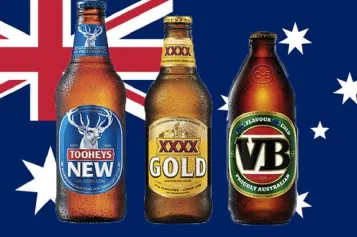

In [2]:
# Leitura dos dados - produção de cervejas na Austrália
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly_Prod
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
# Determinar a data como índice
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly_Prod
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


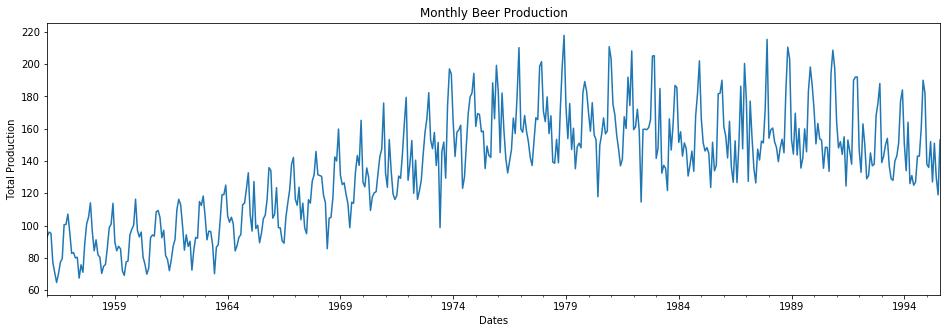

In [4]:
# Plot dos dados
df.index.freq = 'MS'
ax = df['Monthly_Prod'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

## Utilização do "seasonal_decompose" para verificar o comportamento da série
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7
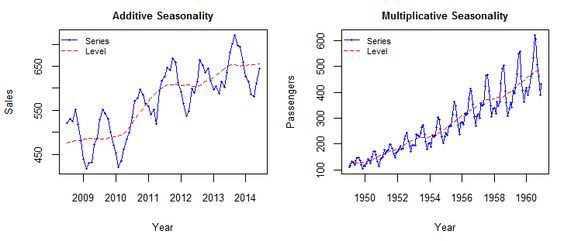

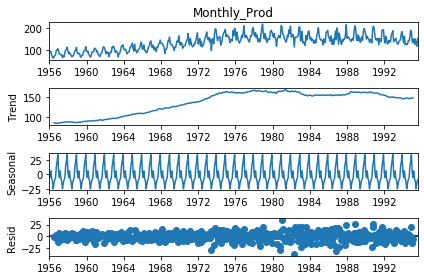

In [5]:
# Seasonal Decompose Plots - ADDITIVE
a = seasonal_decompose(df["Monthly_Prod"], model = "additive")
a.plot();

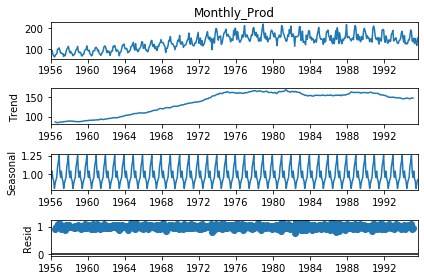

In [6]:
# Seasonal Decompose Plots - MULT
b = seasonal_decompose(df["Monthly_Prod"], model = "multiplicative")
b.plot();

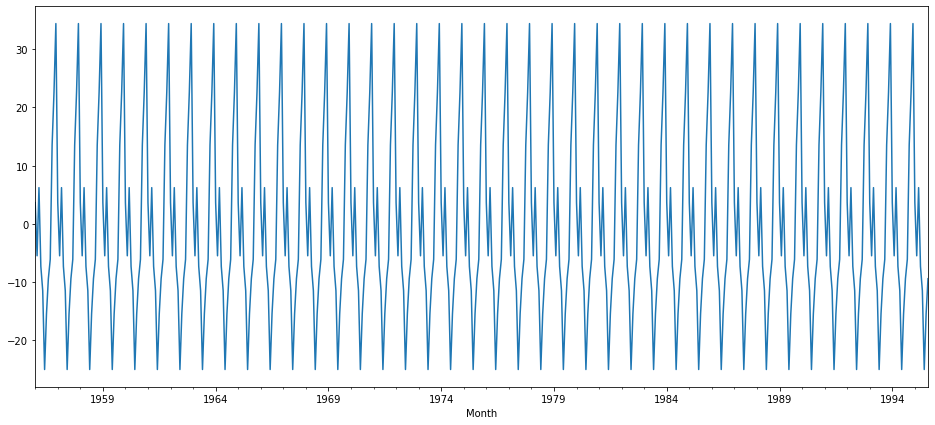

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## Utilização do auto_arima para buscar os melhores parâmetros para o Modelo Arima - p, q, d, m (P, Q, D)

- http://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html
- https://alkaline-ml.com/pmdarima/tips_and_tricks.html

## Iremos utilizar o Akaike Information Criterion (AIC) para avaliar os resultados do ARIMA
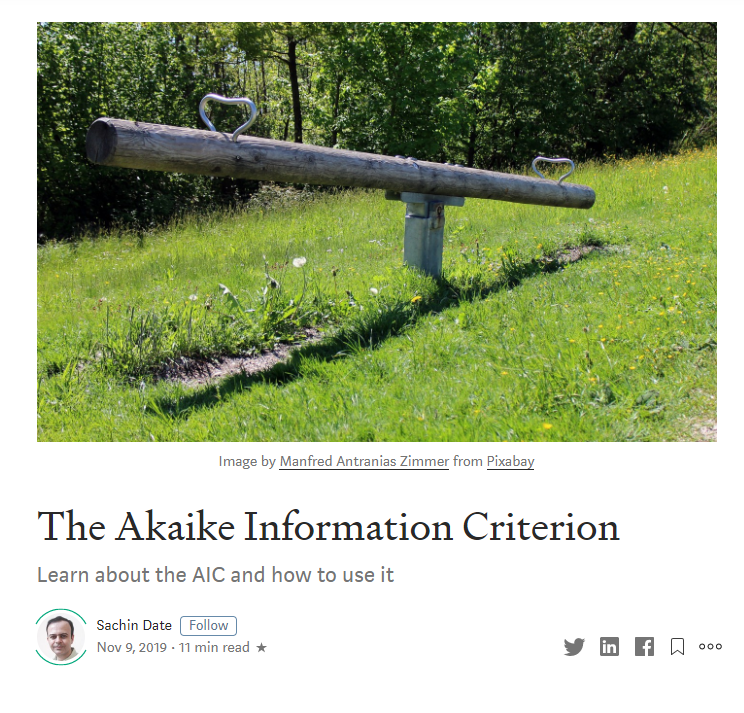
https://towardsdatascience.com/the-akaike-information-criterion-c20c8fd832f2

#### The AIC score gives you a way to measure the goodness-of-fit of your model, while at the same time penalizing the model for over-fitting the data.
#### By itself, an AIC score is not useful. One needs to compare it with the AIC score of other models while performing model selection. A lower AIC score indicates superior goodness-of-fit and a lesser tendency to over-fit.
#### While performing model selection using the AIC score, one should also run other tests of significance such as the Student’s t-test and the F-test so as to perform a 360 degree asessment of the model’s suitability for the data set under consideration.

In [11]:
#auto_arima - realiza uma busca de parâmetros por 'força bruta'
# Melhores valores para p,q,d,P,Q,D
import datetime
print(datetime.datetime.now())
arima_model = auto_arima(df['Monthly_Prod'], seasonal=True, m=12,max_p=4, max_d=4,max_q=4, max_P=4, max_D=4,max_Q=4,trace=True, stepwise=True).summary()
print(datetime.datetime.now())

2020-06-15 11:09:30.088138
Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,12) [intercept=True]; AIC=3556.043, BIC=3589.350, Time=5.000 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4180.337, BIC=4188.663, Time=0.066 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=3905.859, BIC=3922.512, Time=0.863 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=3940.279, BIC=3956.933, Time=1.144 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4178.356, BIC=4182.520, Time=0.038 seconds
Fit ARIMA(2,1,2)x(0,0,1,12) [intercept=True]; AIC=3897.413, BIC=3926.557, Time=2.767 seconds
Fit ARIMA(2,1,2)x(1,0,0,12) [intercept=True]; AIC=3682.515, BIC=3711.658, Time=4.634 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA(2,1,2)x(2,0,1,12) [intercept=True]; AIC=3555.161, BIC=3592.631, Time=13.335 seconds
Fit ARIMA(2,1,2)x(2,0,0,1

In [12]:
# Apresentação do sumário com os resultados da execução
arima_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1738.352
Date:                              Mon, 15 Jun 2020   AIC                           3498.704
Time:                                      11:29:05   BIC                           3544.500
Sample:                                           0   HQIC                          3516.713
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.019      0.073      0.941      -0.035       0.038
ar.L1         -1.1475      0.005   -214.948      0.000      -1.158      -1.137
ar.L2         -0.9906      0.006   -177.340      0.000      -1.002      -0.980
ma.L1          0.2167      0.024      9.054      0.000       0.170       0.264
ma.L2         -0.0095      0.024     -0.404      0.687      -0.056       0.037
ma.L3         -0.8631      0.022    -38.662      0.000      -0.907      -0.819
ar.S.L12       0.9671      0.084     11.520      0.000       0.803       1.132
ar.S.L24       0.0079      0.053      0.149      0.881      -0.096       0.111
ar.S.L36       0.0161      0.063      0.254      0.799      -0.108       0.140
ma.S.L12      -0.7595      0.072    -10.586      0.000      -0.900      -0.619
sigma2        80.5134      4.294     18.749      0.000      72.097      88.930
===================================================================================
Ljung-Box (Q):                       60.28   Jarque-Bera (JB):                37.04
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Train-Test split
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
# Execução com os parâmetros encontrados
arima_model_select = SARIMAX(train_data['Monthly_Prod'], order = (2,1,3), seasonal_order = (3,0,1,12))
arima_result = arima_model_select.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Monthly_Prod   No. Observations:                  464
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1696.250
Date:                              Mon, 15 Jun 2020   AIC                           3412.501
Time:                                      11:31:52   BIC                           3453.878
Sample:                                  01-01-1956   HQIC                          3428.790
                                       - 08-01-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1477      0.006   -182.532      0.000      -1.160      -1.135
ar.L2         -0.9902      0.007   -150.094      0.000      -1.003      -0.977
ma.L1          0.2275      0.028      8.151      0.000       0.173       0.282
ma.L2         -0.0096      0.027     -0.357      0.721      -0.062       0.043
ma.L3         -0.8555      0.025    -33.962      0.000      -0.905      -0.806
ar.S.L12       1.0016      0.088     11.405      0.000       0.830       1.174
ar.S.L24      -0.0034      0.057     -0.061      0.952      -0.114       0.108
ar.S.L36      -0.0074      0.066     -0.113      0.910      -0.136       0.121
ma.S.L12      -0.7941      0.074    -10.751      0.000      -0.939      -0.649
sigma2        84.8980      4.802     17.681      0.000      75.487      94.309
===================================================================================
Ljung-Box (Q):                       62.11   Jarque-Bera (JB):                37.11
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               3.65   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Predição do modelo
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.165933
1994-10-01    157.266044
1994-11-01    179.516488
1994-12-01    180.780225
1995-01-01    141.224037
1995-02-01    139.694562
1995-03-01    148.208260
1995-04-01    133.717988
1995-05-01    137.210689
1995-06-01    117.931836
1995-07-01    129.205637
1995-08-01    140.438856
Freq: MS, Name: ARIMA Predictions, dtype: float64

In [15]:
# dados de Teste
test_data['Monthly_Prod']

Month
1994-09-01    143.0
1994-10-01    160.0
1994-11-01    190.0
1994-12-01    182.0
1995-01-01    138.0
1995-02-01    136.0
1995-03-01    152.0
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Freq: MS, Name: Monthly_Prod, dtype: float64

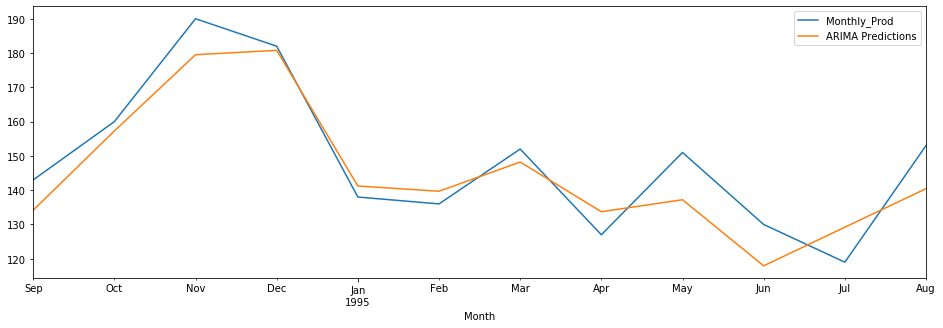

In [16]:
# Plot Comparativo
test_data['Monthly_Prod'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True)

In [ ]:
# Avaliação do Modelo
SMAPE = (abs(test_data['en']-arima_pred)/(abs(test_data['en'])+abs(arima_pred))).sum()

arima_rmse_error = rmse(test_data['en'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = temp_model['enDif1'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}\nSMAPE: {SMAPE}')

In [17]:
# Avaliação do Modelo
arima_rmse_error = rmse(test_data['Monthly_Prod'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 73.18191906953018
RMSE Error: 8.55464312929126
Mean: 136.39537815126045


In [18]:
test_data['ARIMA_Predictions'] = arima_pred

## Predição com o Prophet

In [19]:
df_pr = df.copy()
df_pr = df.reset_index()
# preparação dos dados para o Prophet
df_pr.columns = ['ds','y']
train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

In [20]:
from fbprophet import Prophet
m = Prophet()
# Fit do modelo
m.fit(train_data_pr)
# montagem do dataframe para as predições
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.146328,130.772524,155.217669,151.099974,151.191748,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,-7.956851,0.0,0.0,0.0,143.189478
472,1995-05-01,151.082843,127.126072,152.934472,151.018630,151.148040,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,-11.400291,0.0,0.0,0.0,139.682552
473,1995-06-01,151.017241,115.183193,139.928325,150.922026,151.103921,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,-23.915887,0.0,0.0,0.0,127.101354
474,1995-07-01,150.953756,122.761276,148.106194,150.841655,151.071298,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,-15.746555,0.0,0.0,0.0,135.207201
475,1995-08-01,150.888155,128.622559,154.547332,150.747349,151.041374,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,-9.208543,0.0,0.0,0.0,141.679612


In [21]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.087502
1994-10-01,166.104924
1994-11-01,173.729015
1994-12-01,185.977964
1995-01-01,155.260571
1995-02-01,146.818146
1995-03-01,158.923972
1995-04-01,143.189478
1995-05-01,139.682552


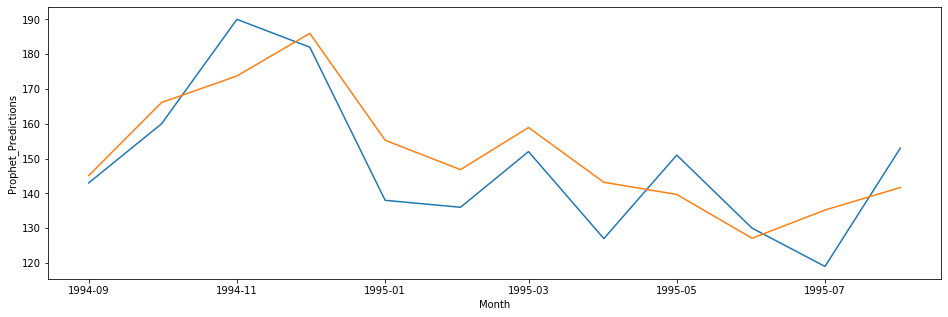

In [22]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly_Prod"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [23]:
prophet_rmse_error = rmse(test_data['Monthly_Prod'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['Monthly_Prod'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.20903532674512
RMSE Error: 11.454651252951576
Mean: 136.39537815126045


## Comparação entre os Modelos

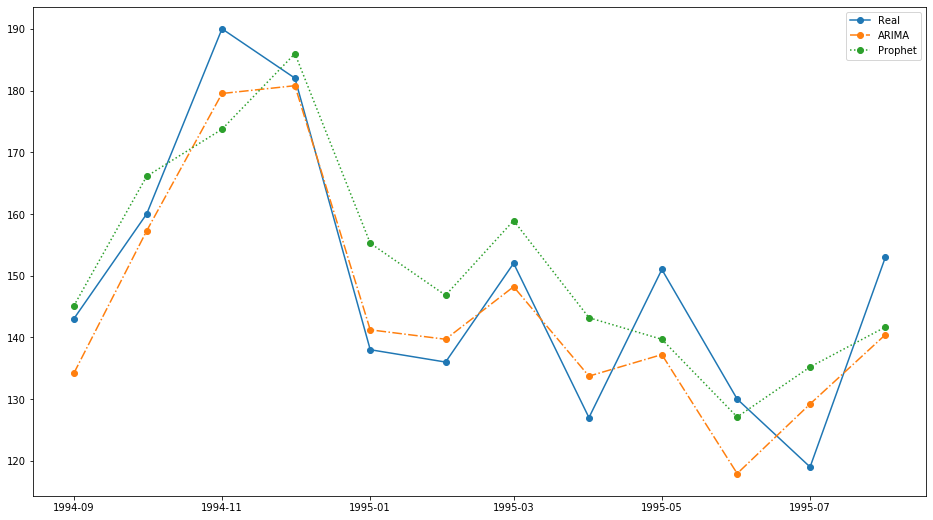

In [24]:
rmse_errors = [arima_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly_Prod"], linestyle="-", label="Real")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.", label="ARIMA")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":", label="Prophet")
plt.legend()
plt.show()

In [25]:
print(f"Mean: {test_data['Monthly_Prod'].mean()}")
errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.554643,73.181919
1,Prophet,11.454651,131.209035


In [26]:
# Dados finais das predições
test_data

,Monthly_Prod,ARIMA_Predictions,Prophet_Predictions
Month,,,
1994-09-01,143.0,134.165933,145.087502
1994-10-01,160.0,157.266044,166.104924
1994-11-01,190.0,179.516488,173.729015
1994-12-01,182.0,180.780225,185.977964
1995-01-01,138.0,141.224037,155.260571
1995-02-01,136.0,139.694562,146.818146
1995-03-01,152.0,148.208260,158.923972
1995-04-01,127.0,133.717988,143.189478
1995-05-01,151.0,137.210689,139.682552
